In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smoking-related-lung-cancers/lung_cancer.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/kaggle/input/smoking-related-lung-cancers/lung_cancer.csv")

In [3]:
data.info

<bound method DataFrame.info of           pid  age  gender   race   smoker  days_to_cancer stage_of_cancer
0      100001   70    Male  White  Current             NaN             NaN
1      100002   66    Male  White  Current             NaN             NaN
2      100003   64    Male  White  Current             NaN             NaN
3      100004   60    Male  White   Former             NaN             NaN
4      100005   64    Male  White   Former             NaN             NaN
...       ...  ...     ...    ...      ...             ...             ...
53422  218890   73  Female  White  Current             NaN             NaN
53423  218891   66    Male  White  Current             NaN             NaN
53424  218892   56    Male  White   Former             NaN             NaN
53425  218893   69    Male  White   Former             NaN             NaN
53426  218894   57    Male  White  Current             NaN             NaN

[53427 rows x 7 columns]>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53427 entries, 0 to 53426
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              53427 non-null  int64  
 1   age              53427 non-null  int64  
 2   gender           53427 non-null  object 
 3   race             53166 non-null  object 
 4   smoker           53427 non-null  object 
 5   days_to_cancer   2033 non-null   float64
 6   stage_of_cancer  2032 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ MB


In [5]:
data.head()

,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
0,100001,70,Male,White,Current,NaN,NaN
1,100002,66,Male,White,Current,NaN,NaN
2,100003,64,Male,White,Current,NaN,NaN
3,100004,60,Male,White,Former,NaN,NaN
4,100005,64,Male,White,Former,NaN,NaN


In [6]:
data.columns

Index(['pid', 'age', 'gender', 'race', 'smoker', 'days_to_cancer',
       'stage_of_cancer'],
      dtype='object')

In [7]:
np.unique(data['gender'])

array(['Female', 'Male'], dtype=object)

In [8]:
#Replacing Male -> 0  and Female -> 1
data = data.replace('Male',0)
data= data.replace('Female',1)
data.head()

/tmp/ipykernel_33/963782967.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data= data.replace('Female',1)


,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
0,100001,70,0,White,Current,NaN,NaN
1,100002,66,0,White,Current,NaN,NaN
2,100003,64,0,White,Current,NaN,NaN
3,100004,60,0,White,Former,NaN,NaN
4,100005,64,0,White,Former,NaN,NaN


In [11]:
np.unique(data['smoker'])

array(['Current', 'Former'], dtype=object)

In [12]:
#Replacing Former Smoker -> 0 and Current Smoker -> 1
data = data.replace('Former',0)
data= data.replace('Current',1)
data.head()

/tmp/ipykernel_33/4070787080.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data= data.replace('Current',1)


,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
0,100001,70,0,White,1,NaN,NaN
1,100002,66,0,White,1,NaN,NaN
2,100003,64,0,White,1,NaN,NaN
3,100004,60,0,White,0,NaN,NaN
4,100005,64,0,White,0,NaN,NaN


In [17]:
unique_values = data['race'].unique()
unique_values

array(['White', 'Native Hawaiian or Other Pacific Islander',
       'More than one race', 'Asian', nan, 'Black or African-American',
       'American Indian or Alaskan Native',
       'Participant refused to answer'], dtype=object)

In [30]:
#Replacing race column values to respective integer values
data = data.replace('Participant refused to answer',0)
data= data.replace('American Indian or Alaskan Native',1)
data = data.replace('Black or African-American',2)
data= data.replace('Asian',3)
data = data.replace('More than one race',4)
data= data.replace('Native Hawaiian or Other Pacific Islander',5)
data = data.replace('White',6)
data.head()

,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
0,100001,70,0,6.0,1,NaN,NaN
1,100002,66,0,6.0,1,NaN,NaN
2,100003,64,0,6.0,1,NaN,NaN
3,100004,60,0,6.0,0,NaN,NaN
4,100005,64,0,6.0,0,NaN,NaN


In [32]:
#Filling the null values in race column with 7
data["race"].fillna(7,inplace=True)
data.head()

,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
0,100001,70,0,6.0,1,NaN,NaN
1,100002,66,0,6.0,1,NaN,NaN
2,100003,64,0,6.0,1,NaN,NaN
3,100004,60,0,6.0,0,NaN,NaN
4,100005,64,0,6.0,0,NaN,NaN


In [36]:
#replacing the null values in days_to_cancer column to 0
data["days_to_cancer"].fillna(0,inplace=True)
data.head()

,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
0,100001,70,0,6.0,1,0.0,NaN
1,100002,66,0,6.0,1,0.0,NaN
2,100003,64,0,6.0,1,0.0,NaN
3,100004,60,0,6.0,0,0.0,NaN
4,100005,64,0,6.0,0,0.0,NaN


In [37]:
unique_values = data['stage_of_cancer'].unique()
unique_values

array([nan, 'IA', 'IIB', 'IV', 'IIIB', 'IIIA', 'IIA', 'IB'], dtype=object)

In [38]:
#Replacing stage_of_cancer from least severe to most severe
data= data.replace('IA',1)
data = data.replace('IB',2)
data= data.replace('IIA',3)
data = data.replace('IIB',4)
data= data.replace('IIIA',5)
data = data.replace('IIIB',6)
data = data.replace('IV',7)
data["stage_of_cancer"].fillna(0,inplace=True)
data.head()

/tmp/ipykernel_33/3337290204.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('IV',7)
/tmp/ipykernel_33/3337290204.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["stage_of_cancer"].fillna(0,inplace=True)


,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
0,100001,70,0,6.0,1,0.0,0.0
1,100002,66,0,6.0,1,0.0,0.0
2,100003,64,0,6.0,1,0.0,0.0
3,100004,60,0,6.0,0,0.0,0.0
4,100005,64,0,6.0,0,0.0,0.0


<Axes: xlabel='race', ylabel='smoker'>

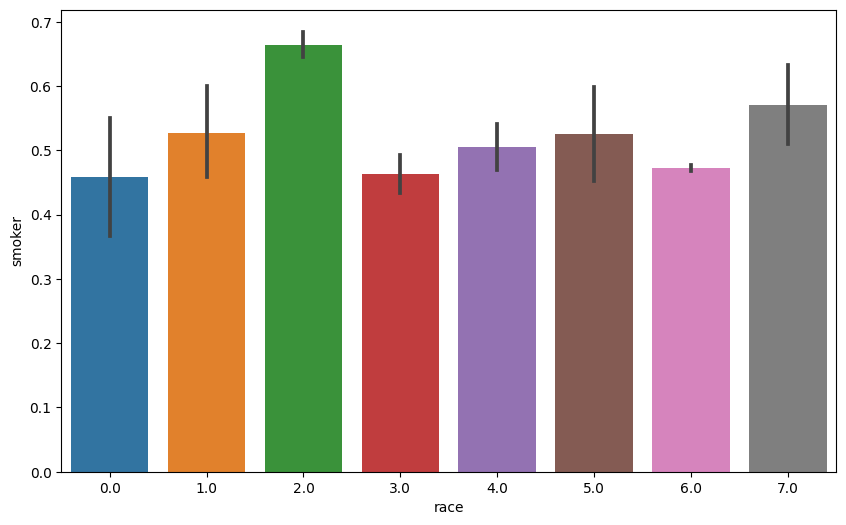

In [40]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'race', y = 'smoker', data = data)

#Race in words -> Number value assigned
# Participant refused to answer -> 0
# American Indian or Alaskan Native -> 1
# Black or African-American -> 2
# Asian -> 3
# More than one race -> 4
# Native Hawaiian or Other Pacific Islander -> 5
# White -> 6
# NaN -> 7


#Conclusion: It can be observed from the plot that People from Black/African-American community have highest propotion of smokers whereas least number
# smokers by propotion exist in people from White/Asian race. 

<Axes: xlabel='stage_of_cancer', ylabel='smoker'>

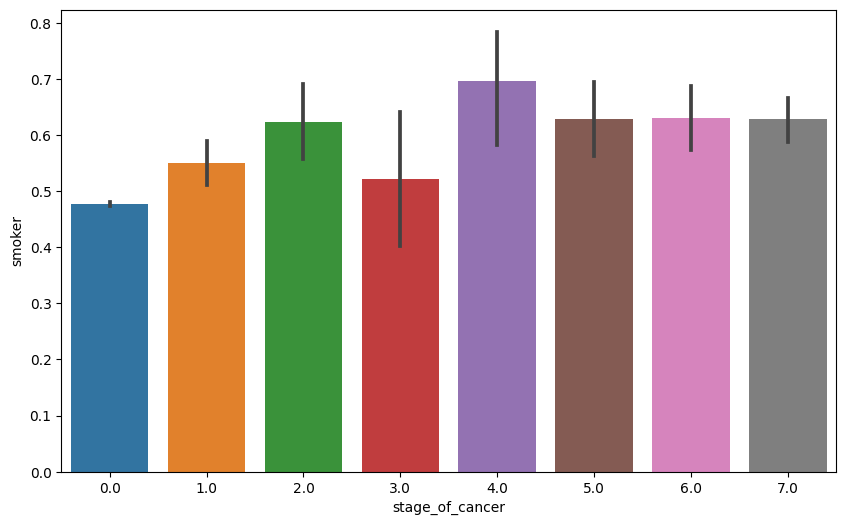

In [41]:
#Stage of Caner -> Number value assigned
# Nan -> 0
# IA -> 1
# IB -> 2
# IIA -> 3
# IIB -> 4
# IIIA -> 5
# IIIB -> 6
# IV -> 7

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'stage_of_cancer', y = 'smoker', data = data)

#It can be observed from the plot below that people suffering with level 4 of Cancer are 70% likely to be smokers, whereas people suffering from 
#stage 5, 6, 7 are almost 63% likely to be smokers.

<Axes: xlabel='stage_of_cancer', ylabel='gender'>

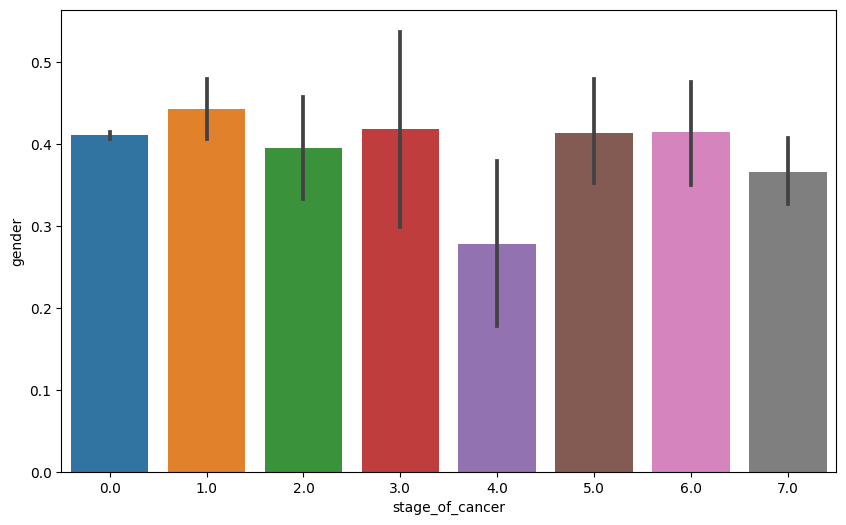

In [42]:
# Male -> 0
# Female -> 1

#Stage of Caner -> Number value assigned
# Nan -> 0
# IA -> 1
# IB -> 2
# IIA -> 3
# IIB -> 4
# IIIA -> 5
# IIIB -> 6
# IV -> 7


fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'stage_of_cancer', y = 'gender', data = data)

#Conclusion: People from all the stages of Cancer (1-7) are more likely to be men than women. Therefore cancer patients are more male than female.

<Axes: xlabel='gender', ylabel='smoker'>

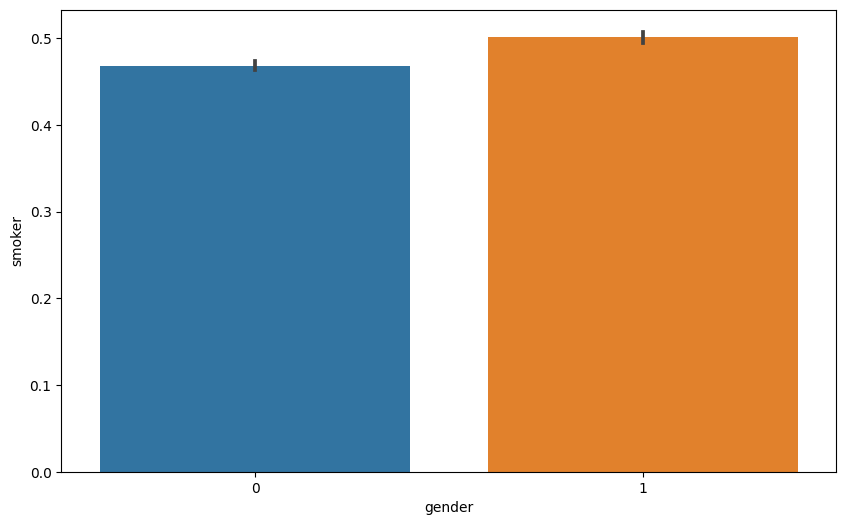

In [45]:
# Former Smoker -> 0
# Current Smoker -> 1

# Male -> 0
# Female -> 1


fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'gender', y = 'smoker', data = data)

#Conclusion: Males are found to be more current smokers than former smokes. I.E: More men are currently smoking than men who quit smoking -> Number
# men smoking have increased. As seen in last plot, number of cancer pateints are more male than female. This indicates that more men smokers  can be
#linked to more number of men being cancer patients. 

#Conclusion: Females are found to be equal in number for both former and current smokers. Therefore number of Females smoking are equal to number
# of females who have quit smoking. Number of females smoking have remained same.

<Axes: xlabel='stage_of_cancer', ylabel='age'>

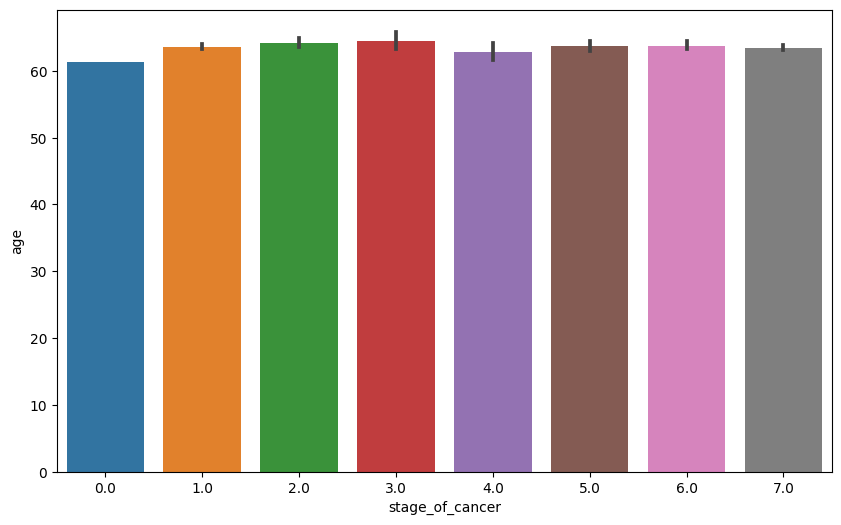

In [47]:
#Stage of Caner -> Number value assigned
# Nan -> 0
# IA -> 1
# IB -> 2
# IIA -> 3
# IIB -> 4
# IIIA -> 5
# IIIB -> 6
# IV -> 7

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'stage_of_cancer', y = 'age', data = data)

#Conclusion: It can be observed that average age of all cancer patients in above 60